In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import FactorAnalysis
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('Graduation_Outcomes_large.csv', sep=',')
data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [3]:
data = data[~(data['Total Grads - n'].apply(str) == 's')]
data = data[~(data['Total Regents - % of grads'].apply(str) == '.')]

In [4]:
data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%


In [5]:
data['Total Grads - % of cohort'] = data['Total Grads - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Total Regents - % of cohort'] = data['Total Regents - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Total Regents - % of grads'] = data['Total Regents - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Advanced Regents - % of cohort'] = data['Advanced Regents - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Regents w/o Advanced - % of grads'] = data['Regents w/o Advanced - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Local - % of cohort'] = data['Local - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Local - % of grads'] = data['Local - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Still Enrolled - % of cohort'] = data['Still Enrolled - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Dropped Out - % of cohort'] = data['Dropped Out - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Regents w/o Advanced - % of cohort'] = data['Regents w/o Advanced - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Advanced Regents - % of grads'] = data['Advanced Regents - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')

data['Total Grads - n'] = data['Total Grads - n'].astype('int64')
data['Total Regents - n'] = data['Total Regents - n'].astype('int64')
data['Advanced Regents - n'] = data['Advanced Regents - n'].astype('float64').astype('int64')
data['Dropped Out - n'] = data['Dropped Out - n'].astype('float64').astype('int64')
data['Still Enrolled - n'] = data['Still Enrolled - n'].astype('float64').astype('int64')
data['Regents w/o Advanced - n'] = data['Regents w/o Advanced - n'].astype('float64').astype('int64')
data['Local - n'] = data['Local - n'].astype('int64')

# Firs two features to categorial if it is necessary

In [6]:
data.dropna(inplace=True)

In [7]:
data.dtypes

Demographic                            object
DBN                                    object
School Name                            object
Cohort                                 object
Total Cohort                            int64
Total Grads - n                         int64
Total Grads - % of cohort             float64
Total Regents - n                       int64
Total Regents - % of cohort           float64
Total Regents - % of grads            float64
Advanced Regents - n                    int64
Advanced Regents - % of cohort        float64
Advanced Regents - % of grads         float64
Regents w/o Advanced - n                int64
Regents w/o Advanced - % of cohort    float64
Regents w/o Advanced - % of grads     float64
Local - n                               int64
Local - % of cohort                   float64
Local - % of grads                    float64
Still Enrolled - n                      int64
Still Enrolled - % of cohort          float64
Dropped Out - n                   

In [8]:
number_data = data.drop(['Demographic', 'DBN', 'School Name', 'Cohort'], axis=1)

In [9]:
number_data.head()

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
1,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,64,46,71.9,32,50.0,69.6,7,10.9,15.2,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


In [10]:
normalized_data = StandardScaler().fit_transform(number_data)

In [11]:
# number_data.to_csv('nschool_data.csv', index=False)

### Calculate principal components using spectral (eigenvalue) decomposition and singular value decomposition.

In [12]:
number_of_features = number_data.columns.size

In [13]:
mean_vec = np.mean(normalized_data, axis=0)
cov_mat = (normalized_data - mean_vec).T.dot((normalized_data - mean_vec)) / (normalized_data.shape[0]-1)
# cov_mat = np.cov(X_std.T)

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

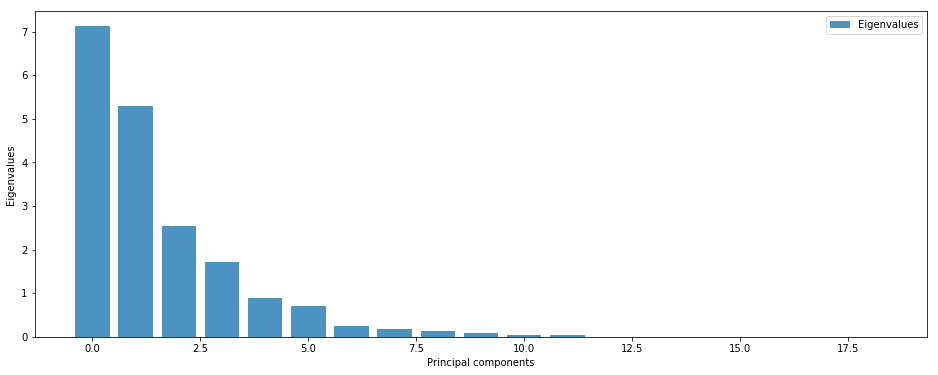

In [15]:
# variance = cov_mat.diagonal()
plt.figure(figsize=(16, 6))
plt.bar(range(number_of_features), eig_vals, alpha=0.8, align='center', label='Eigenvalues')
plt.ylabel('Eigenvalues ')
plt.xlabel('Principal components')
plt.legend(loc='best');
# plt.savefig('file.png')

In [16]:
U, s, V = np.linalg.svd(normalized_data.T)

In [17]:
U.dot(np.diag(s))

array([[ -6.97278582e+01,   1.07398915e+02,  -1.36075465e+01,
         -2.77673563e+00,  -4.69938888e+00,   4.95989976e-01,
          3.43980399e+00,  -3.70566957e+00,   1.02962052e+00,
          1.75187093e+00,   2.19119589e+00,  -6.49813096e-03,
          2.40785998e+00,   2.05272310e-02,   4.65141835e-04,
         -1.23364515e-06,   3.18622612e-05,   3.92909969e-05,
         -4.94962186e-29],
       [ -9.10478935e+01,   8.51682767e+01,   1.69579389e+00,
         -1.53045094e+01,  -2.01391887e+01,  -2.04610124e+01,
         -1.66738182e+00,   4.65910051e+00,  -4.61491456e+00,
         -9.71010556e-01,  -5.57563904e-01,   2.06452177e-01,
         -4.55168389e-01,   6.65843824e-02,  -4.39124164e-02,
         -1.04769823e-02,  -1.70294798e-03,   8.50090001e-02,
         -1.87836962e-28],
       [ -9.30471611e+01,  -5.65696427e+01,   8.18930529e+00,
         -6.55065728e+01,   1.08472253e+01,   1.14127461e+01,
          3.29406912e+00,  -7.65706819e+00,   2.86039800e+00,
          1.0288

In [18]:
matrix_w = np.hstack(eig.reshape(19,1) for eig in eig_vecs)

In [19]:
normalized_data.dot(matrix_w)

array([[-0.1119639 , -0.68349187, -1.10839282, ...,  0.45605465,
         0.49556258,  0.12534024],
       [-0.15986099, -0.15432592, -0.67590781, ...,  0.06299382,
         0.13754919,  0.0111186 ],
       [-0.41451586,  0.23841286,  0.12514957, ..., -0.27131626,
        -0.16991338,  0.27192391],
       ..., 
       [-0.88365237, -0.07513459, -0.33944614, ...,  0.99341889,
         0.89866433,  0.96216942],
       [-0.89253115, -0.24212434,  0.07476805, ...,  0.86024584,
         0.78974213,  1.2653943 ],
       [-0.89253115, -0.24212434,  0.07476805, ...,  0.86024584,
         0.78974213,  1.2653943 ]])

In [20]:
n_components = 6
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(normalized_data.T)
principalDf = pd.DataFrame(data = X_reduced)
principalDf

# pca.score_samples(normalized_data.T)

# s * s / (number_of_features - 1)

,0,1,2,3,4,5
0,19.246897,-74.844970,-30.034034,11.040229,3.310736,-0.620786
1,-11.184696,-72.097403,-13.245232,22.218456,18.618281,20.387057
2,-91.710826,44.172200,30.681953,54.062690,-9.292110,-11.235234
3,-27.083629,-67.876799,-5.210359,11.150377,26.989592,32.165708
4,-109.714740,29.375660,12.756817,-2.095260,-7.880684,-8.861555
5,-99.376139,27.913546,-21.943931,-40.495045,-8.013204,-7.367116
6,-29.741465,-59.040063,41.014783,-6.598438,33.301436,42.172874
7,-67.156442,-22.478576,84.485543,-29.668925,-14.083438,-18.243152
8,-62.497885,-29.589327,78.244997,-34.741118,-19.557157,-20.402227
9,-9.693264,-42.876639,-55.262232,25.734811,11.374982,9.268009


#### Factor analysis

In [21]:
fa = FactorAnalysis(n_components=6)

In [22]:
fa.fit_transform(normalized_data)

D:\Programs\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


array([[ 0.62621604, -0.4744101 , -0.27926601,  0.54258588, -0.83725916,
        -0.64197019],
       [-0.03000653, -0.82562579, -0.23308642,  0.39003125, -0.46647049,
         0.64581138],
       [-0.8414052 , -1.25992199, -0.1651421 ,  0.03207159,  0.65505194,
         0.52743071],
       ..., 
       [ 1.11552605, -0.20945566, -0.1638124 , -0.20541449,  2.36548565,
         0.77031892],
       [ 0.46817253, -0.56150157, -0.28927157, -0.20371901,  2.63223789,
         0.34970985],
       [ 0.46817253, -0.56150157, -0.28927157, -0.20371901,  2.63223789,
         0.34970985]])

In [23]:
fa.noise_variance_

array([  9.70842945e-06,   7.52334214e-03,   7.74302937e-04,
         4.90492841e-05,   5.10467568e-02,   4.57971513e-07,
         1.04424282e-01,   4.15453766e-02,   1.33875560e-06,
         1.62755883e-01,   8.14611408e-02,   1.05305809e-06,
         1.37070851e-01,   2.12449358e-01,   3.56727419e-04,
         5.02965961e-02,   5.00714752e-02,   8.14974282e-02,
         7.17475274e-02])

In [24]:
fa.score(normalized_data)

-0.32546349467594898

In [25]:
fa.get_precision()

array([[  1.35941723e+02,  -5.12474337e+01,   2.30760414e+00,
         -4.17258192e+01,   2.51091707e+00,  -1.49962077e+01,
          4.76395030e+00,   3.33445026e+00,   6.11876263e+00,
         -3.84011531e+00,   4.57630189e-01,   1.32153475e+01,
         -1.19192935e+01,  -1.20947765e+00,   1.83284528e+00,
         -3.26785669e+01,  -2.55801278e-01,  -1.95978173e+01,
         -1.39264224e+00],
       [ -5.12474337e+01,   1.32393191e+02,  -1.16907967e+01,
         -8.61113671e+01,  -8.29467800e-02,   7.81438407e+00,
         -3.50183246e-02,  -3.59127083e-03,   3.37530986e+00,
         -2.17989728e-02,  -6.80924570e-02,   4.31230634e-01,
         -8.17090918e-03,  -3.49248220e-02,  -1.30934730e-01,
          2.55215907e-01,   5.53790809e-01,  -7.52977047e-02,
         -3.12193840e-01],
       [  2.30760414e+00,  -1.16907967e+01,   3.61389611e+01,
          8.78275219e+00,  -9.37284088e+00,  -2.37345176e-01,
          1.14276038e+00,  -2.27423064e+00,  -1.15049211e-01,
         -9.1027

In [26]:
fa.get_covariance()

array([[ 1.        ,  0.93488269,  0.02759509,  0.86417242,  0.09657671,
         0.15653374,  0.65656142,  0.22086057,  0.28150209,  0.84028243,
        -0.08545264, -0.07973048,  0.75708087, -0.14744821, -0.15651551,
         0.79887808, -0.05180788,  0.75969186,  0.06129858],
       [ 0.93488269,  1.        ,  0.25040958,  0.9772811 ,  0.30616185,
         0.28782302,  0.82216554,  0.38153754,  0.41469169,  0.85080135,
         0.03969809, -0.05296511,  0.58039239, -0.17961395, -0.28776456,
         0.56540203, -0.23314414,  0.53002731, -0.11510228],
       [ 0.02759509,  0.25040958,  1.        ,  0.3040162 ,  0.87041749,
         0.61154192,  0.28362396,  0.53744546,  0.48067617,  0.22988645,
         0.64633762,  0.25174793, -0.06790979, -0.00319804, -0.61160152,
        -0.34038873, -0.85283678, -0.28788259, -0.67813831],
       [ 0.86417242,  0.9772811 ,  0.3040162 ,  1.        ,  0.39711914,
         0.37966541,  0.88573754,  0.46418411,  0.4896275 ,  0.81498073,
         0.081

In [27]:
pd.DataFrame(fa.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.146118,-0.271297,-0.596499,-0.360151,-0.848798,-0.997390,-0.276799,-0.457264,-0.472978,-0.346235,-0.695421,-0.693453,0.188269,0.670848,0.997225,0.093995,0.483687,0.082147,0.429962
1,0.273541,0.354875,0.222269,0.389347,0.256575,0.071587,0.574717,0.855796,0.880558,0.030380,-0.489240,-0.720304,0.058762,-0.128471,-0.071404,0.069955,-0.206303,0.061163,-0.126818
2,0.948890,0.855715,-0.112519,0.765480,-0.092661,-0.009308,0.512484,-0.079791,-0.030099,0.830581,-0.046808,0.016861,0.788107,-0.010520,0.009252,0.806483,0.068921,0.764330,0.152757
3,-0.058166,0.242271,0.309622,0.362701,0.203416,-0.000821,0.456271,0.080886,-0.001444,0.127070,0.194629,0.000387,-0.321404,0.133776,0.000842,-0.493801,-0.238436,-0.511892,-0.283571
4,-0.006335,-0.044471,-0.696763,0.033759,-0.335314,0.000150,0.133268,-0.057961,0.000165,-0.101533,-0.394315,0.000025,-0.315122,-0.549663,0.000150,0.081356,0.628631,0.010595,0.411709
5,-0.000032,0.004220,-0.002414,0.000130,-0.016295,0.000004,-0.008662,-0.026643,-0.000003,0.011065,0.004058,-0.000003,0.017776,0.029538,0.001066,-0.187354,-0.465441,0.248329,0.673833
